In [31]:
import pandas as pd

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Read the CSV file into a DataFrame
df_heart_disease = pd.read_excel('D:/Data science ass/13/Decision Tree/heart_disease.xlsx', sheet_name= 'Heart_disease')

# Display the first 5 rows
print(df_heart_disease.head().to_markdown(index=False, numalign="left", stralign="left"))

# Print the column names and their data types
print(df_heart_disease.info())

| age   | sex   | cp              | trestbps   | chol   | fbs   | restecg        | thalch   | exang   | oldpeak   | slope       | thal         | num   |
|:------|:------|:----------------|:-----------|:-------|:------|:---------------|:---------|:--------|:----------|:------------|:-------------|:------|
| 63    | Male  | typical angina  | 145        | 233    | True  | lv hypertrophy | 150      | False   | 2.3       | downsloping | fixed defect | 0     |
| 41    | Male  | atypical angina | 135        | 203    | False | normal         | 132      | False   | 0         | flat        | fixed defect | 0     |
| 57    | Male  | asymptomatic    | 140        | 192    | False | normal         | 148      | False   | 0.4       | flat        | fixed defect | 0     |
| 52    | Male  | typical angina  | 118        | 186    | False | lv hypertrophy | 190      | False   | 0         | flat        | fixed defect | 0     |
| 57    | Male  | asymptomatic    | 110        | 201    | False | normal         |

In [62]:
import altair as alt
import numpy as np

# 1. Check for missing values in all columns and display the count of missing values for each column
missing_values = df_heart_disease.isnull().sum()

# Display columns with missing values and their counts
print("\nMissing Values per Column:\n")
print(missing_values[missing_values > 0].to_markdown(numalign="left", stralign="left"))
print("\nDescriptive Statistics:\n", df_heart_disease.describe().to_markdown(numalign="left", stralign="left"))
# 2. Check for outliers in the `oldpeak` column using the IQR method
Q1 = df_heart_disease['oldpeak'].quantile(0.25)
Q3 = df_heart_disease['oldpeak'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
#Box Plots for Numerical Columns
numerical_columns = ['age', 'trestbps', 'chol', 'thalch']
df_melted = df_heart_disease[numerical_columns].melt(var_name='Feature', value_name='Value')
box_plot = alt.Chart(df_melted).mark_boxplot().encode(
    x=alt.X('Feature:N', axis=alt.Axis(title='Numerical Features')),
    y=alt.Y('Value:Q'),
    tooltip=['Feature', 'Value']
).properties(
    title='Box Plots for Numerical Features'
).interactive()
box_plot.save('box_plots_numerical_features.json')
box_plot.show()
# Identify outliers
outliers = df_heart_disease[(df_heart_disease['oldpeak'] < lower_bound) | (df_heart_disease['oldpeak'] > upper_bound)]

# 3. If there are outliers, display the number of outliers
if not outliers.empty:
    num_outliers = len(outliers)
    print(f"\nNumber of outliers in 'oldpeak': {num_outliers}")

# 4, 5, 6, 7. Create subplots for numerical columns and plot histograms
numerical_columns = ['age', 'trestbps', 'chol', 'oldpeak']
fig = alt.vconcat()

for col in numerical_columns:
    chart = alt.Chart(df_heart_disease).mark_bar().encode(
        x=alt.X(col + ':Q', bin=True),
        y=alt.Y('count()', title='Count'),
        tooltip=[col + ':Q', 'count()']
    ).properties(
        title=f'Distribution of {col}'
    ).interactive()

    fig |= chart

fig.save('numerical_columns_histograms.json')
fig.show()

# 8, 9, 10, 11. Create another figure with subplots for categorical variables and plot countplots
categorical_columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal', 'num']
cat_fig = alt.vconcat()

for col in categorical_columns:
    chart = alt.Chart(df_heart_disease).mark_bar().encode(
        x=alt.X(col + ':N', sort='-y'),
        y=alt.Y('count()', title='Count'),
        tooltip=[col, 'count()']
    ).properties(
        title=f'Distribution of {col}'
    ).interactive()

    cat_fig |= chart

cat_fig.save('categorical_columns_countplots.json')
cat_fig.show()
numerical_columns_with_oldpeak = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']
correlation_matrix = df_heart_disease[numerical_columns_with_oldpeak].corr()
corr_df = correlation_matrix.reset_index().melt('index', var_name='column', value_name='correlation')
# Create the base chart with encodings
base = alt.Chart(corr_df).encode(
    x='index:O',
    y='column:O',
    color=alt.Color('correlation:Q', scale=alt.Scale(scheme='redblue')),  # Use a valid scheme like 'redblue'
    tooltip=['index', 'column', 'correlation']
)

# Heatmap layer
heatmap = base.mark_rect()

# Text layer for annotations
text = base.mark_text(baseline='middle').encode(
    text=alt.Text('correlation:Q', format='.2f'),
    color=alt.condition(
        alt.datum.correlation > 0.5,
        alt.value('white'),
        alt.value('black')   
    )
)

# Combine layers and set properties
corr_heatmap = (heatmap + text).properties(
    title='Correlation Heatmap for Numerical Features'
).interactive()

# Save the plot
corr_heatmap.save('correlation_heatmap_numerical_features.json')
corr_heatmap.show()


Missing Values per Column:

|         | 0   |
|:--------|:----|
| oldpeak | 62  |

Descriptive Statistics:
 |       | age     | trestbps   | chol    | thalch   | oldpeak   | num     |
|:------|:--------|:-----------|:--------|:---------|:----------|:--------|
| count | 908     | 908        | 908     | 908      | 846       | 908     |
| mean  | 53.7919 | 133.431    | 201.485 | 135.957  | 0.891253  | 1.00881 |
| std   | 9.15803 | 20.4016    | 112.098 | 26.8049  | 1.09387   | 1.14444 |
| min   | 29      | 0          | 0       | 60       | -2.6      | 0       |
| 25%   | 47.75   | 120        | 176.75  | 118      | 0         | 0       |
| 50%   | 54      | 130        | 224     | 138      | 0.5       | 1       |
| 75%   | 60      | 144        | 270     | 156      | 1.5       | 2       |
| max   | 77      | 200        | 603     | 202      | 6.2       | 4       |


alt.Chart(...)


Number of outliers in 'oldpeak': 16


alt.HConcatChart(...)

alt.HConcatChart(...)

alt.LayerChart(...)

In [63]:
# 1. Convert 'sex' to binary
df_heart_disease['sex'] = df_heart_disease['sex'].map({'Male': 1, 'Female': 0})

# 2. Convert 'fbs' and 'exang' to 0 and 1
df_heart_disease['fbs'] = df_heart_disease['fbs'].astype(int)
df_heart_disease['exang'] = df_heart_disease['exang'].map({'True': 1, 'False': 0})

# 3. One-hot encode categorical columns
categorical_columns = ['cp', 'restecg', 'slope', 'thal']
df_heart_disease = pd.get_dummies(df_heart_disease, columns=categorical_columns)

# 4. Impute missing values in 'oldpeak' with its median
median_oldpeak = df_heart_disease['oldpeak'].median()
df_heart_disease['oldpeak'].fillna(median_oldpeak, inplace=True)

# 5. Display the first 5 rows of the updated DataFrame
print(df_heart_disease.head().to_markdown(index=False, numalign="left", stralign="left"))

| age   | sex   | trestbps   | chol   | fbs   | thalch   | exang   | oldpeak   | num   | cp_asymptomatic   | cp_atypical angina   | cp_non-anginal   | cp_typical angina   | restecg_lv hypertrophy   | restecg_normal   | restecg_st-t abnormality   | slope_downsloping   | slope_flat   | slope_upsloping   | thal_fixed defect   | thal_normal   | thal_reversable defect   |
|:------|:------|:-----------|:-------|:------|:---------|:--------|:----------|:------|:------------------|:---------------------|:-----------------|:--------------------|:-------------------------|:-----------------|:---------------------------|:--------------------|:-------------|:------------------|:--------------------|:--------------|:-------------------------|
| 63    | 1     | 145        | 233    | 1     | 150      | nan     | 2.3       | 0     | 0                 | 0                    | 0                | 1                   | 1                        | 0                | 0                          | 1           

Accuracy: 0.4835
Precision: 0.4819
Recall: 0.4835
F1-Score: 0.4826
ROC-AUC: 0.6270


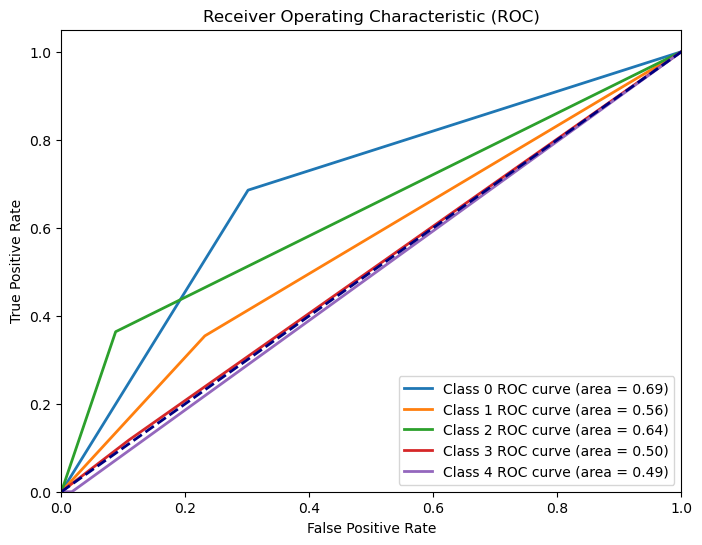

In [78]:
from sklearn.impute import SimpleImputer
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    roc_curve,
    auc
)
import matplotlib.pyplot as plt


# 1. Separate features (X) and target variable (y)
X = df_heart_disease.drop('num', axis=1)  # Features
y = df_heart_disease['num']  # Target variable

# Impute missing values with the median
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X)

# 2. Split data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# 4. Initialize a DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=42)

# 5. Fit the model to the training data
clf.fit(X_train, y_train)

# 6. Make predictions on the testing data
y_pred = clf.predict(X_test)

# 8. Calculate and print evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
roc_auc = roc_auc_score(y_test, clf.predict_proba(X_test), multi_class='ovr', average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")

# 9. Plot ROC curve for each class
plt.figure(figsize=(8, 6))
for i in range(clf.n_classes_):
    fpr, tpr, _ = roc_curve(y_test == i, clf.predict_proba(X_test)[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'Class {i} ROC curve (area = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()


In [79]:
import numpy as np
import altair as alt
import pandas as pd
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score, roc_curve

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    roc_curve,
)
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np
import altair as alt
import pandas as pd

# 1. Define the parameter grid
param_grid = {
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

# 2. Initialize GridSearchCV
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='roc_auc_ovr')

# 3. Fit to the training data
grid_search.fit(X_train, y_train)

# 4. Print the best parameters
print("Best Parameters:", grid_search.best_params_)

# 5. Initialize a new Decision Tree classifier with the best parameters
best_clf = DecisionTreeClassifier(**grid_search.best_params_, random_state=42)

# 6. Fit the new model to the training data
best_clf.fit(X_train, y_train)

# 7. Make predictions on the testing data
y_pred_best = best_clf.predict(X_test)

# 8. Calculate evaluation metrics
accuracy_best = accuracy_score(y_test, y_pred_best)
precision_best = precision_score(y_test, y_pred_best, average='weighted')
recall_best = recall_score(y_test, y_pred_best, average='weighted')
f1_best = f1_score(y_test, y_pred_best, average='weighted')

# 9. Calculate ROC AUC score for each class
# Binarize the output
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
y_pred_best_prob = best_clf.predict_proba(X_test)

roc_auc_scores_best = []
for i in range(len(np.unique(y_test))):
    roc_auc_scores_best.append(roc_auc_score(y_test_bin[:, i], y_pred_best_prob[:, i]))

macro_roc_auc_best = np.mean(roc_auc_scores_best)

# 10. Print the evaluation metrics
print(f"\nMetrics after Hyperparameter Tuning:")
print(f"Accuracy: {accuracy_best:.4f}")
print(f"Precision: {precision_best:.4f}")
print(f"Recall: {recall_best:.4f}")
print(f"F1-Score: {f1_best:.4f}")
print(f"Macro Average ROC-AUC: {macro_roc_auc_best:.4f}")
# Assuming y_test and y_pred_best_prob have already been defined and contain the true and predicted values

# 11. Calculate ROC curve for each class
fpr_best = dict()
tpr_best = dict()

# Binarize the output
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
for i in range(len(np.unique(y_test))):
    fpr_best[i], tpr_best[i], _ = roc_curve(y_test_bin[:, i], y_pred_best_prob[:, i])

# 12. Prepare data for plotting
roc_data = []
for i in range(len(np.unique(y_test))):
    roc_data.extend([{'class': str(i), 'fpr': fpr, 'tpr': tpr} for fpr, tpr in zip(fpr_best[i], tpr_best[i])])

roc_df = pd.DataFrame(roc_data)

# Create the chart
chart = alt.Chart(roc_df).mark_line().encode(
    x=alt.X('fpr:Q', title='False Positive Rate'),
    y=alt.Y('tpr:Q', title='True Positive Rate'),
    color=alt.Color('class:N', legend=alt.Legend(title='Class')),
    tooltip=['class:N', 'fpr:Q', 'tpr:Q']
).properties(
    title='ROC Curves for Each Class (After Hyperparameter Tuning)',
    width=600,
    height=400
).interactive()

# Add diagonal line
diagonal = alt.Chart(pd.DataFrame({'fpr': [0, 1], 'tpr': [0, 1]})).mark_line(strokeDash=[5, 5]).encode(
    x='fpr:Q',
    y='tpr:Q',
    color=alt.value('grey')
)

# Add text for macro average ROC AUC
text_df = pd.DataFrame({'text': [f'Macro Avg ROC AUC: {macro_roc_auc_best:.2f}']})
text = alt.Chart(text_df).mark_text(
    align='left',
    baseline='middle',
    dx=5,
    dy=-5,
    fontSize=12
).encode(
    x=alt.value(0.5),
    y=alt.value(0.1),
    text='text:N'
)

# Combine the chart, diagonal line, and text
final_chart = chart + diagonal + text

# Display the chart
final_chart


Best Parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 10}

Metrics after Hyperparameter Tuning:
Accuracy: 0.5659
Precision: 0.5442
Recall: 0.5659
F1-Score: 0.5507
Macro Average ROC-AUC: 0.6935


alt.LayerChart(...)

INTERVIEW QUESTIONS
1. What are some common hyperparameters of decision tree models, and how do they affect the model's performance?
Answer) Decision trees are a popular machine learning algorithm that can be tuned using various hyperparameters to improve their performance. Here are some common ones:

Maximum depth: Controls the depth of the tree. A deeper tree can capture more complex patterns but is prone to overfitting.
Minimum samples split: Specifies the minimum number of samples required to split a node. A larger value can prevent overfitting but might lead to underfitting.
Minimum samples leaf: Determines the minimum number of samples in a leaf node. A larger value can prevent overfitting.
Maximum features: Sets the number of features considered at each split. A smaller value can reduce computational cost but might impact performance.
Criterion: Specifies the function used to measure the quality of a split. Common options include "gini" (Gini impurity) and "entropy".
Random state: Sets the random number generator seed for reproducibility.
How hyperparameters affect performance:

Overfitting: If the tree is too deep or has too few samples per leaf, it can overfit to the training data and perform poorly on unseen data.
Underfitting: If the tree is too shallow or has too many samples per leaf, it might fail to capture important patterns in the data.
Computational cost: Deeper trees and more features considered at each split can increase computational time.

By carefully tuning these hyperparameters, you can find the optimal balance between bias and variance, leading to improved model performance.

2. What is the difference between the Label encoding and One-hot encoding?
Answer) Label encoding and one-hot encoding are two techniques used to convert categorical data into a numerical format that can be processed by machine learning algorithms.

Label encoding:

Assigns a unique integer to each category.
Suitable for ordinal data (where categories have a natural order) but might introduce an artificial order for nominal data.
Can be used with algorithms that assume an ordinal relationship between categories.
One-hot encoding:

Creates a new binary feature for each category, with a value of 1 for the corresponding category and 0 for others.
Suitable for nominal data (where categories have no inherent order).
Can be used with most machine learning algorithms.
Choosing the right technique:

Ordinal data: Label encoding is generally preferred.
Nominal data: One-hot encoding is usually the better choice.
Large number of categories: One-hot encoding can create a high-dimensional feature space, which might lead to the curse of dimensionality. In such cases, consider techniques like feature hashing or embedding.

By understanding the differences between these techniques, you can select the appropriate one for your specific dataset and machine learning task.